### 0. Get List Pull dates

In [0]:
%sql

-- Check campaign_code and wave_id from promo history data

SELECT
    split_code,
    wave_id,
    list_pull_dt,
    count(*) ct,
    count(distinct VIN_ID) as VIN,
    count(distinct subscription_skey) dskey,
    count(distinct account_number) as acct
FROM gmdataassets.mobility_cds_public.cds_merkle_agg_promo_hist ph
WHERE 
    date(ph.list_pull_dt) >= '2024-04-17' and date(ph.list_pull_dt) <= '2024-04-20' --List pull 4/19
    and ph.campaign_code = 'OLA' 
    --and ph.wave_id = '1'
    and ph.wave_id in ('1','2','3')
group by split_code, list_pull_dt, wave_id
order by list_pull_dt ASC, split_code

--list_pull_dt is 2024-04-19



split_code wave_id list_pull_dt ct VIN dskey acct 1A 1 2024-04-19T04:00:00Z 815132 815132 815132 806646 1AH 1 2024-04-19T04:00:00Z 271712 271712 271712 270098 1B 1 2024-04-19T04:00:00Z 94360 94360 94360 94109 1BH 1 2024-04-19T04:00:00Z 31454 31454 31454 31346 1C 1 2024-04-19T04:00:00Z 229539 229539 229539 227944 1CH 1 2024-04-19T04:00:00Z 76513 76513 76513 76024 1D 1 2024-04-19T04:00:00Z 62946 62946 62946 62748 1DH 1 2024-04-19T04:00:00Z 20982 20982 20982 20921 2A 2 2024-04-19T04:00:00Z 815131 815131 815131 806586 2AH 2 2024-04-19T04:00:00Z 271712 271712 271712 270097 2B 2 2024-04-19T04:00:00Z 94360 94360 94360 94078 2BH 2 2024-04-19T04:00:00Z 31454 31454 31454 31302 2C 2 2024-04-19T04:00:00Z 229539 229539 229539 228039 2CH 2 2024-04-19T04:00:00Z 76514 76514 76514 76188 2D 2 2024-04-19T04:00:00Z 62946 62946 62946 62735 2DH 2 2024-04-19T04:00:00Z 20982 20982 20982 20951 3A 3 2024-04-19T04:00:00Z 815131 815131 815131 806845 3AH 3 2024-04-19T04:00:00Z 271712 271712 271712 269949 3B 3 2024-04-19T04:00:00Z 94360 94360 94360 94140 3BH 3 2024-04-19T04:00:00Z 31453 31453 31453 31384 3C 3 2024-04-19T04:00:00Z 229540 229540 229540 227839 3CH 3 2024-04-19T04:00:00Z 76513 76513 76513 75741 3D 3 2024-04-19T04:00:00Z 62945 62945 62945 62720 3DH 3 2024-04-19T04:00:00Z 20982 20982 20982 20888

#### 0A - Check VIN in multiple split code

In [0]:
%sql
--select * from gmdataassets.mobility_cds_public.cds_merkle_agg_promo_hist ph limit 10;
create temp view lp_v as (
SELECT
    split_code,
    wave_id,
    list_pull_dt,
    VIN_ID,
    subscription_skey,
    account_number
FROM gmdataassets.mobility_cds_public.cds_merkle_agg_promo_hist ph
WHERE
    date(ph.list_pull_dt) >= '2024-04-17' and date(ph.list_pull_dt) <= '2024-04-20' --List pull 4/19
    and ph.campaign_code = 'OLA' 
    --and ph.wave_id = '1'
    and ph.wave_id in ('1','2','3')
group by ALL
order by list_pull_dt ASC, split_code
);

select VIN_ID, count(distinct split_code) as ct_split, count(distinct wave_id) as ct_wv from lp_v
group by VIN_ID
having ct_split > 1;






VIN_ID ct_split ct_wv

### 0.0 - Latest Order dates

In [0]:
%sql
----------------------------------------------------
------------ Test Variable code --------------------
----------------------------------------------------

DROP TEMPORARY VARIABLE IF EXISTS cutoff;
DECLARE VARIABLE cutoff STRING;

-- Set a SQL variable to a value
SET VAR cutoff = '2024-07-23';
--VALUES (cutoff);

SELECT
    split_code,
    wave_id,
    list_pull_dt,
    count(*) ct,
    count(distinct VIN_ID) as VIN,
    count(distinct subscription_skey) dskey,
    count(distinct account_number) as acct
FROM gmdataassets.mobility_cds_public.cds_merkle_agg_promo_hist ph
WHERE 
    date(ph.list_pull_dt) >= cutoff
    and ph.campaign_code = 'OLA' 
    --and ph.wave_id = '1'
    and ph.wave_id in ('1','2','3')
group by split_code, list_pull_dt, wave_id
order by list_pull_dt ASC, split_code

split_code wave_id list_pull_dt ct VIN dskey acct

In [0]:
%sql

DROP TEMPORARY VARIABLE IF EXISTS cutoff;
DECLARE VARIABLE cutoff STRING;

-- Set a SQL variable to a value
SET VAR cutoff = '2024-06-04';

DROP view if exists order_v;
create temp view order_v as (
  /*this table grabs order history and zipcode*/
SELECT f.VIN_ID, g.ACCOUNTNUMBER, a.VEH_ID, 
a.prod_id, c.CREATE_MKTG_CHANNL_CD,
date(a.create_timstm), date(a.START_DT), date(a.VEH_PROD_END_DT), a.VEH_PROD_CANCEL_DT, 
  b.PRICE_PLAN_CD, e.PROD_TYPE_CD,a.BNDL_OFFER_ID,  d.BUNDLED_OFFER_CD
FROM gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_gaa.ons_veh_prod a
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_gaa.ons_order b
    ON a.order_nbr = b.order_nbr
    --AND b.PRICE_PLAN_CD in ('MTHLY','SUBSCBRPPD','COMP')   
    AND  b.PRICE_PLAN_CD in ('MTHLY','SUBSCBRPPD','SBSCBRPPD','COMP') --Add SBSCBRPPD due to an update
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_gaa.ons_order_line c
    ON a.order_nbr = c.order_nbr
    AND a.ORDER_LINE_NBR = c.ORDER_LINE_NBR
--    AND c.CREATE_MKTG_CHANNL_CD = 'MC_ADVSR'
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_gaa.ons_bndl_offer d
    ON a.bndl_offer_id = d.id
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_gaa.ons_prod e
    ON a.prod_id = e.id
    AND e.PROD_TYPE_CD = 'CORE'
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_gaa.ons_veh f
    ON a.veh_id = f.id
    --AND f.VIN_ID = '1G1BC5SM0G7318434'
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_ccsowner.r_account g
    ON a.APLCBL_ACCT_ID = g.id
    AND g.ACCOUNTTYPECODE IN ('PN','BN')
--    AND g.ACCOUNTNUMBER = '149649952'
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_ccsowner.POSTALADDRESS h
    ON f.GARAGE_ADDR_LOC_ID = h.contactinfoid
    --AND h.COUNTRYISOCODE IN ('US','CA')
    AND h.COUNTRYISOCODE IN ('US')
where
--date(a.create_timstm) >= '2023-10-12' and date(a.create_timstm) <= '2023-10-27' --Date range
--date(a.create_timstm) >= '2022-01-01' and date(a.create_timstm) <= '2024-06-01'  --Only looking at Orders 2022 after and before Cutoff
date(a.create_timstm) >= '2022-01-01' and date(a.create_timstm) <= cutoff  --Only looking at Orders 2022 after and before Cutoff
);

--------------------  Table for latest Date for VIN & Account ----------------------------
DROP view if exists order_latest_acct_v;
create temp view order_latest_acct_v as (
select vin_id, accountnumber, max(date(create_timstm)) as latest_date from order_v
group by all
);

--------------------  Table for latest Date for VIN ----------------------------------
DROP view if exists order_latest_vin_v;
create temp view order_latest_vin_v as (
select vin_id, max(date(create_timstm)) as latest_date from order_v
group by all
);

--select * from order_latest_v limit 10;

-------------------- Output table for latest Date for VIN & Account ----------------------------------

DROP view if exists output_order_latest_acct_v;
create temp view output_order_latest_acct_v as (
SELECT
    split_code,
    wave_id,
    list_pull_dt,
    ph.VIN_ID,
    account_number,
    subscription_skey,
    latest_date,
    datediff(month,latest_date,cutoff) as past_months,
    CASE WHEN datediff(month,latest_date,cutoff) is null then 999
      WHEN datediff(month,latest_date,cutoff) >= 0 and datediff(month,latest_date,cutoff) <=3 then '<3 Month' 
      WHEN datediff(month,latest_date,cutoff) >=4 and datediff(month,latest_date,cutoff) <=6  then '4 - 6 Month'
      WHEN datediff(month,latest_date,cutoff) >=7 and datediff(month,latest_date,cutoff) <=12  then '7 - 12 Month'
      WHEN datediff(month,latest_date,cutoff) >=13 and datediff(month,latest_date,cutoff) <=18  then '1YR - 1YR6M'
      WHEN datediff(month,latest_date,cutoff) >=19 and datediff(month,latest_date,cutoff) <=24  then '1YR7M - 2YR'
      WHEN datediff(month,latest_date,cutoff) >=25 then '>2YR'
      ELSE 'NA' 
      END AS past_groups,
    CASE WHEN SUBSTRING(split_code,len(split_code),1)='H' THEN "Holdout"
      ELSE "Treatment" END AS Holdout
FROM gmdataassets.mobility_cds_public.cds_merkle_agg_promo_hist ph
LEFT JOIN order_latest_acct_v as b
ON ph.VIN_ID = b.VIN_ID and ph.account_number = b.accountnumber
WHERE 
    date(ph.list_pull_dt) >= '2024-04-17' and date(ph.list_pull_dt) <= '2024-04-20' --List pull 4/19
    and ph.campaign_code = 'OLA' 
    --and ph.wave_id = '1'
    and ph.wave_id in ('1','2','3')
group by ALL
order by list_pull_dt ASC, split_code
);

-------------------- Output table for latest Date for VIN ----------------------------------
DROP view if exists output_order_latest_vin_v;
create temp view output_order_latest_vin_v as (
SELECT
    split_code,
    wave_id,
    list_pull_dt,
    ph.VIN_ID,
    --account_number,
    --subscription_skey,
    latest_date,
    datediff(month,latest_date,cutoff) as past_months,
    CASE WHEN datediff(month,latest_date,cutoff) is null then 999
      WHEN datediff(month,latest_date,cutoff) >= 0 and datediff(month,latest_date,cutoff) <=3 then '<3 Month' 
      WHEN datediff(month,latest_date,cutoff) >=4 and datediff(month,latest_date,cutoff) <=6  then '4 - 6 Month'
      WHEN datediff(month,latest_date,cutoff) >=7 and datediff(month,latest_date,cutoff) <=12  then '7 - 12 Month'
      WHEN datediff(month,latest_date,cutoff) >=13 and datediff(month,latest_date,cutoff) <=18  then '1YR - 1YR6M'
      WHEN datediff(month,latest_date,cutoff) >=19 and datediff(month,latest_date,cutoff) <=24  then '1YR7M - 2YR'
      WHEN datediff(month,latest_date,cutoff) >=25 then '>2YR'
      ELSE 'NA' 
      END AS past_groups,
    CASE WHEN SUBSTRING(split_code,len(split_code),1)='H' THEN "Holdout"
      ELSE "Treatment" END AS Holdout
FROM gmdataassets.mobility_cds_public.cds_merkle_agg_promo_hist ph
LEFT JOIN order_latest_acct_v as b
ON ph.VIN_ID = b.VIN_ID --and ph.account_number = b.accountnumber
WHERE 
    date(ph.list_pull_dt) >= '2024-04-17' and date(ph.list_pull_dt) <= '2024-04-20' --List pull 4/19
    and ph.campaign_code = 'OLA' 
    --and ph.wave_id = '1'
    and ph.wave_id in ('1','2','3')
group by ALL
order by list_pull_dt ASC, split_code
);


Select  
    split_code,
    wave_id,
    list_pull_dt,
    past_months,
    past_groups,
    count(*) ct,
    count(distinct VIN_ID) as VIN,
    count(distinct subscription_skey) dskey,
    count(distinct account_number) as acct
from output_order_latest_acct_v
group by ALL
order by list_pull_dt ASC, split_code


split_code wave_id list_pull_dt past_months past_groups ct VIN dskey acct 1A 1 2024-04-19T04:00:00.000Z 28 >2YR 9523 9523 9523 9513 1A 1 2024-04-19T04:00:00.000Z 7 7 - 12 Month 1832 1832 1832 1830 1A 1 2024-04-19T04:00:00.000Z 11 7 - 12 Month 4136 4136 4136 4134 1A 1 2024-04-19T04:00:00.000Z 8 7 - 12 Month 2554 2554 2554 2553 1A 1 2024-04-19T04:00:00.000Z 27 >2YR 10767 10767 10767 10755 1A 1 2024-04-19T04:00:00.000Z 0 <3 Month 2104 2104 2104 2102 1A 1 2024-04-19T04:00:00.000Z 21 1YR7M - 2YR 10931 10931 10931 10922 1A 1 2024-04-19T04:00:00.000Z 14 1YR - 1YR6M 6727 6727 6727 6722 1A 1 2024-04-19T04:00:00.000Z 20 1YR7M - 2YR 10408 10408 10408 10396 1A 1 2024-04-19T04:00:00.000Z 12 7 - 12 Month 3961 3961 3961 3955 1A 1 2024-04-19T04:00:00.000Z 4 4 - 6 Month 282 282 282 282 1A 1 2024-04-19T04:00:00.000Z 24 1YR7M - 2YR 13855 13855 13855 13841 1A 1 2024-04-19T04:00:00.000Z 10 7 - 12 Month 3378 3378 3378 3373 1A 1 2024-04-19T04:00:00.000Z 5 4 - 6 Month 418 418 418 417 1A 1 2024-04-19T04:00:00.000Z 6 4 - 6 Month 1607 1607 1607 1604 1A 1 2024-04-19T04:00:00.000Z 13 1YR - 1YR6M 3521 3521 3521 3517 1A 1 2024-04-19T04:00:00.000Z 9 7 - 12 Month 2709 2709 2709 2707 1A 1 2024-04-19T04:00:00.000Z 25 >2YR 11070 11070 11070 11061 1A 1 2024-04-19T04:00:00.000Z 29 >2YR 817 817 817 817 1A 1 2024-04-19T04:00:00.000Z 23 1YR7M - 2YR 11287 11287 11287 11281 1A 1 2024-04-19T04:00:00.000Z 1 <3 Month 1273 1273 1273 1271 1A 1 2024-04-19T04:00:00.000Z 15 1YR - 1YR6M 8446 8446 8446 8436 1A 1 2024-04-19T04:00:00.000Z 19 1YR7M - 2YR 11644 11644 11644 11624 1A 1 2024-04-19T04:00:00.000Z null 999 615314 615314 615314 609388 1A 1 2024-04-19T04:00:00.000Z 3 <3 Month 255 255 255 255 1A 1 2024-04-19T04:00:00.000Z 2 <3 Month 640 640 640 639 1A 1 2024-04-19T04:00:00.000Z 18 1YR - 1YR6M 10439 10439 10439 10424 1A 1 2024-04-19T04:00:00.000Z 22 1YR7M - 2YR 11251 11251 11251 11239 1A 1 2024-04-19T04:00:00.000Z 16 1YR - 1YR6M 22153 22153 22153 22113 1A 1 2024-04-19T04:00:00.000Z 26 >2YR 12647 12647 12647 12635 1A 1 2024-04-19T04:00:00.000Z 17 1YR - 1YR6M 9183 9183 9183 9170 1AH 1 2024-04-19T04:00:00.000Z 27 >2YR 3113 3113 3113 3113 1AH 1 2024-04-19T04:00:00.000Z 28 >2YR 2725 2725 2725 2722 1AH 1 2024-04-19T04:00:00.000Z 29 >2YR 249 249 249 249 1AH 1 2024-04-19T04:00:00.000Z 17 1YR - 1YR6M 2506 2506 2506 2506 1AH 1 2024-04-19T04:00:00.000Z 0 <3 Month 846 846 846 845 1AH 1 2024-04-19T04:00:00.000Z 18 1YR - 1YR6M 2984 2984 2984 2984 1AH 1 2024-04-19T04:00:00.000Z 14 1YR - 1YR6M 4371 4371 4371 4368 1AH 1 2024-04-19T04:00:00.000Z 1 <3 Month 552 552 552 552 1AH 1 2024-04-19T04:00:00.000Z 21 1YR7M - 2YR 3050 3050 3050 3047 1AH 1 2024-04-19T04:00:00.000Z 24 1YR7M - 2YR 3935 3935 3935 3934 1AH 1 2024-04-19T04:00:00.000Z null 999 180935 180935 180935 179695 1AH 1 2024-04-19T04:00:00.000Z 7 7 - 12 Month 3610 3610 3610 3607 1AH 1 2024-04-19T04:00:00.000Z 23 1YR7M - 2YR 3218 3218 3218 3216 1AH 1 2024-04-19T04:00:00.000Z 4 4 - 6 Month 324 324 324 324 1AH 1 2024-04-19T04:00:00.000Z 15 1YR - 1YR6M 2332 2332 2332 2331 1AH 1 2024-04-19T04:00:00.000Z 3 <3 Month 472 472 472 472 1AH 1 2024-04-19T04:00:00.000Z 5 4 - 6 Month 409 409 409 409 1AH 1 2024-04-19T04:00:00.000Z 12 7 - 12 Month 5382 5382 5382 5377 1AH 1 2024-04-19T04:00:00.000Z 19 1YR7M - 2YR 3313 3313 3313 3308 1AH 1 2024-04-19T04:00:00.000Z 2 <3 Month 1835 1835 1835 1834 1AH 1 2024-04-19T04:00:00.000Z 26 >2YR 3592 3592 3592 3592 1AH 1 2024-04-19T04:00:00.000Z 11 7 - 12 Month 5330 5330 5330 5328 1AH 1 2024-04-19T04:00:00.000Z 9 7 - 12 Month 4497 4497 4497 4494 1AH 1 2024-04-19T04:00:00.000Z 25 >2YR 3178 3178 3178 3178 1AH 1 2024-04-19T04:00:00.000Z 16 1YR - 1YR6M 6082 6082 6082 6075 1AH 1 2024-04-19T04:00:00.000Z 13 1YR - 1YR6M 5303 5303 5303 5302 1AH 1 2024-04-19T04:00:00.000Z 8 7 - 12 Month 4026 4026 4026 4025 1AH 1 2024-04-19T04:00:00.000Z 22 1YR7M - 2YR 3159 3159 3159 3159 1AH 1 2024-04-19T04:00:00.000Z 20 1YR7M - 2YR 2966 2966 2966 2965 1AH 1 2024-04-19T04:00:00.000Z 6 4 - 6 Month 2326 2326 2326 2323 1AH 1 2024-04-19T04:00:00.000Z

In [0]:
%sql
select * from output_order_latest_acct_v where VIN_ID in ('1GNEVGKW7LJ329043','3GCPYBEK9LG146832','1GNEVJKW2MJ222724') limit 100;

select VIN_ID, ACCOUNTNUMBER, VEH_ID, 
  prod_id,date(create_timstm), date(START_DT), date(VEH_PROD_END_DT), VEH_PROD_CANCEL_DT, 
  PRICE_PLAN_CD, PROD_TYPE_CD,BNDL_OFFER_ID,  BUNDLED_OFFER_CD
from order_v
where VIN_ID in ('1GNEVGKW7LJ329043','3GCPYBEK9LG146832','1GNEVJKW2MJ222724')
and create_timstm >= '2020-01-01'
order by VIN_ID, create_timstm


In [0]:
%sql
select * from output_order_latest_acct_v limit 10;

### 1. Code: Match VIN and Account Number

In [0]:
%sql

DROP TABLE IF EXISTS work.os_mktg_analytics.zz_cardlytics_connected_rmk;
create table work.os_mktg_analytics.zz_cardlytics_connected_rmk as (
with base as (
    SELECT 
        ph.subscription_skey,
        ph.account_number,
        ph.vin_id,
        --ph.first_list_pull_dt, --proved to not be useful for this bc of how ppl are qualified/LPs
        ph.list_pull_dt,
        ph.split_code,
        ph.wave_id,
        ph.campaign_ufr_dt,
        month(campaign_ufr_dt) month_ufr,
        year(campaign_ufr_dt) year_ufr,
        veh.gmqualty_model_yr_nbr model_yr,
        veh.gmqualty_make make,
        veh.gmqualty_model model
    FROM gmdataassets.mobility_cds_public.cds_merkle_agg_promo_hist ph
    INNER JOIN gmdataassets.vehicle360_base_rz.fs_veh_ident veh on veh.veh_id_nbr = ph.vin_id
    WHERE
        date(ph.list_pull_dt) in ('2024-04-19') --first group including holdouts and treated groups
        and ph.campaign_code = 'OLA' and ph.wave_id in ('1','2','3')
),

orders as (
  /*this table grabs order history and zipcode*/
SELECT f.VIN_ID, g.ACCOUNTNUMBER, a.VEH_ID, 
a.prod_id, c.CREATE_MKTG_CHANNL_CD,
date(a.create_timstm), date(a.START_DT), date(a.VEH_PROD_END_DT), a.VEH_PROD_CANCEL_DT, 
  b.PRICE_PLAN_CD, e.PROD_TYPE_CD,a.BNDL_OFFER_ID,  d.BUNDLED_OFFER_CD
FROM gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_gaa.ons_veh_prod a
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_gaa.ons_order b
    ON a.order_nbr = b.order_nbr
    --AND b.PRICE_PLAN_CD in ('MTHLY','SUBSCBRPPD','COMP')   
    AND  b.PRICE_PLAN_CD in ('MTHLY','SUBSCBRPPD','SBSCBRPPD','COMP') --Add SBSCBRPPD due to an update
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_gaa.ons_order_line c
    ON a.order_nbr = c.order_nbr
    AND a.ORDER_LINE_NBR = c.ORDER_LINE_NBR
--    AND c.CREATE_MKTG_CHANNL_CD = 'MC_ADVSR'
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_gaa.ons_bndl_offer d
    ON a.bndl_offer_id = d.id
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_gaa.ons_prod e
    ON a.prod_id = e.id
    AND e.PROD_TYPE_CD = 'CORE'
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_gaa.ons_veh f
    ON a.veh_id = f.id
    --AND f.VIN_ID = '1G1BC5SM0G7318434'
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_ccsowner.r_account g
    ON a.APLCBL_ACCT_ID = g.id
    AND g.ACCOUNTTYPECODE IN ('PN','BN')
--    AND g.ACCOUNTNUMBER = '149649952'
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_ccsowner.POSTALADDRESS h
    ON f.GARAGE_ADDR_LOC_ID = h.contactinfoid
    --AND h.COUNTRYISOCODE IN ('US','CA')
    AND h.COUNTRYISOCODE IN ('US')
where
--date(a.create_timstm) >= '2023-10-12' and date(a.create_timstm) <= '2023-10-27' --Date range
date(a.create_timstm) >= '2024-06-05' --and date(a.create_timstm) <= '2024-06-20' 
),

resp1 as (
  SELECT base.* , o.*,
    ROW_NUMBER () OVER (PARTITION BY base.subscription_skey ORDER BY o.create_timstm ASC) rn --check for 1st ever order during the period
    --ROW_NUMBER () OVER (PARTITION BY base.subscription_skey ORDER BY o.create_timstm DESC) rn   -- Change to Decsending order
  FROM base 
  inner JOIN orders o on o.ACCOUNTNUMBER = base.account_number and o.VIN_ID=base.vin_id
  --inner JOIN orders o on o.VIN_ID=base.vin_id
    and date(o.create_timstm) >= date(base.list_pull_dt)
),

resp as (select * from resp1 where rn=1),

fin as (
  select base.*, 
    prod_id, CREATE_MKTG_CHANNL_CD, create_timstm, 
    date(start_dt), 
    date(veh_prod_end_dt), 
    date(VEH_PROD_CANCEL_DT),
    PRICE_PLAN_CD, BNDL_OFFER_ID, BUNDLED_OFFER_CD,
  case when create_timstm is not null then 1 else 0 end as resp_fl
  from base
  left join resp on resp.subscription_skey = base.subscription_skey )

select * from fin )


--where subscription_skey in (58381126,58386995,58392934)
-- select base.list_pull_dt, base.split_code,
-- select count(*) ct, count(distinct subscription_skey) dskey from fin
-- where base.subscription_skey in
-- (select subscription_skey
-- from base
-- group by subscription_skey
-- having count(*) > 1) 

-- left join resp on resp.subscription_skey = base.subscription_skey
-- group by base.list_pull_dt, base.split_code


In [0]:
%sql

--select * from work.os_mktg_analytics.zz_cardlytics_connected_rmk limit 10;

-- select * from work.os_mktg_analytics.zz_cardlytics_connected_rmk 
-- where create_timstm is not null
-- order by VIN_ID, ACCOUNT_NUMBER, create_timstm limit 1000;

In [0]:
%sql

select create_timstm, START_DT, 
    wave_id, 
    split_code,
    make, 
    CASE WHEN model_yr <= 2016 THEN "Pre2016"
      WHEN model_yr > 2016 THEN model_yr
      ELSE "NA" END AS model_year,
    CASE WHEN wave_id = '1' THEN 'Paid Marketing'
      WHEN wave_id = '2' THEN 'Cardlytics'
      WHEN wave_id = '3' THEN 'Paid Marketing + Cardlytics'
      ELSE "NA" END AS Segment,
    CASE WHEN SUBSTRING(split_code,2,1)='A' THEN "Chevy"
      WHEN SUBSTRING(split_code,2,1)='B' THEN "Buick"
      WHEN SUBSTRING(split_code,2,1)='C' THEN "GMC"
      WHEN SUBSTRING(split_code,2,1)='D' THEN "Cadillac"
      ELSE "NA" END AS Brand,
    CASE WHEN SUBSTRING(split_code,len(split_code),1)='H' THEN "Holdout"
      ELSE "Treatment" END AS Holdout,         
    count(*) ct,
    PRICE_PLAN_CD,
    count(distinct subscription_skey) as dskey
from work.os_mktg_analytics.zz_cardlytics_connected_rmk
group by All
order by create_timstm;

### 2. Code Remove VIN/Account purchased from 05/01 - 06/05/2024

In [0]:
%sql

DROP TABLE IF EXISTS work.os_mktg_analytics.zz_cardlytics_connected_rmk;
create table work.os_mktg_analytics.zz_cardlytics_connected_rmk as (
with base as (
    SELECT 
        ph.subscription_skey,
        ph.account_number,
        ph.vin_id,
        --ph.first_list_pull_dt, --proved to not be useful for this bc of how ppl are qualified/LPs
        ph.list_pull_dt,
        ph.split_code,
        ph.wave_id,
        ph.campaign_ufr_dt,
        month(campaign_ufr_dt) month_ufr,
        year(campaign_ufr_dt) year_ufr,
        veh.gmqualty_model_yr_nbr model_yr,
        veh.gmqualty_make make,
        veh.gmqualty_model model
    FROM gmdataassets.mobility_cds_public.cds_merkle_agg_promo_hist ph
    INNER JOIN gmdataassets.vehicle360_base_rz.fs_veh_ident veh on veh.veh_id_nbr = ph.vin_id
    WHERE
        date(ph.list_pull_dt) in ('2024-04-19') --first group including holdouts and treated groups
        and ph.campaign_code = 'OLA' and ph.wave_id in ('1','2','3')
),

orders as (
  /*this table grabs order history and zipcode*/
SELECT f.VIN_ID, g.ACCOUNTNUMBER, a.VEH_ID, 
a.prod_id, c.CREATE_MKTG_CHANNL_CD,
date(a.create_timstm), date(a.START_DT), date(a.VEH_PROD_END_DT), a.VEH_PROD_CANCEL_DT, 
  b.PRICE_PLAN_CD, e.PROD_TYPE_CD,a.BNDL_OFFER_ID,  d.BUNDLED_OFFER_CD
FROM gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_gaa.ons_veh_prod a
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_gaa.ons_order b
    ON a.order_nbr = b.order_nbr
    --AND b.PRICE_PLAN_CD in ('MTHLY','SUBSCBRPPD','COMP')   
    AND  b.PRICE_PLAN_CD in ('MTHLY','SUBSCBRPPD','SBSCBRPPD','COMP') --Add SBSCBRPPD due to an update
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_gaa.ons_order_line c
    ON a.order_nbr = c.order_nbr
    AND a.ORDER_LINE_NBR = c.ORDER_LINE_NBR
--    AND c.CREATE_MKTG_CHANNL_CD = 'MC_ADVSR'
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_gaa.ons_bndl_offer d
    ON a.bndl_offer_id = d.id
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_gaa.ons_prod e
    ON a.prod_id = e.id
    AND e.PROD_TYPE_CD = 'CORE'
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_gaa.ons_veh f
    ON a.veh_id = f.id
    --AND f.VIN_ID = '1G1BC5SM0G7318434'
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_ccsowner.r_account g
    ON a.APLCBL_ACCT_ID = g.id
    AND g.ACCOUNTTYPECODE IN ('PN','BN')
--    AND g.ACCOUNTNUMBER = '149649952'
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_ccsowner.POSTALADDRESS h
    ON f.GARAGE_ADDR_LOC_ID = h.contactinfoid
    --AND h.COUNTRYISOCODE IN ('US','CA')
    AND h.COUNTRYISOCODE IN ('US')
where
--date(a.create_timstm) >= '2023-10-12' and date(a.create_timstm) <= '2023-10-27' --Date range
--date(a.create_timstm) >= '2024-05-01' --and date(a.create_timstm) <= '2024-06-20' 
--date(a.create_timstm) >= '2024-04-01' and date(a.create_timstm) <= '2024-05-31' --For testing Add More historical purchase
date(a.create_timstm) >= '2024-04-01' 
),

resp1 as (
  SELECT base.* , --o.*,
    o.VIN_ID as vin_id_order, o.ACCOUNTNUMBER, o.VEH_ID, 
    o.prod_id, o.CREATE_MKTG_CHANNL_CD,
    o.create_timstm, o.START_DT, o.VEH_PROD_END_DT, o.VEH_PROD_CANCEL_DT, 
    o.PRICE_PLAN_CD, o.PROD_TYPE_CD,o.BNDL_OFFER_ID,  o.BUNDLED_OFFER_CD,

    ROW_NUMBER () OVER (PARTITION BY base.subscription_skey ORDER BY o.create_timstm ASC) rn --check for 1st ever order during the period
    --ROW_NUMBER () OVER (PARTITION BY base.subscription_skey ORDER BY o.create_timstm DESC) rn   -- Change to Decsending order
  FROM base 
  inner JOIN orders o on o.ACCOUNTNUMBER = base.account_number and o.VIN_ID=base.vin_id
    --and date(o.create_timstm) >= date(base.list_pull_dt)
    --where date(o.create_timstm) >= '2024-06-05'  -- Join create_timstm only post campaign launched
    --where date(o.create_timstm) >= '2024-04-01' and date(o.create_timstm)<= '2024-05-31' -- Testing Join create_timstm only post campaign launched
    where date(o.create_timstm) >= '2024-04-01'  -- Join create_timstm only post campaign launched
),

resp as (select * from resp1 where rn=1),

-------- Add flag to idenfity subscription Keys purchased between 2024-05-01 and 2024-06-04 (prior to campaign start)
pre_purchase_flag as (
  SELECT base.subscription_skey, base.vin_id, base.account_number, min(date(o.create_timstm)) as min_create_timstm,
    CASE WHEN MIN(date(o.create_timstm)) BETWEEN '2024-04-01' AND '2024-04-30' THEN 4 
      WHEN MIN(date(o.create_timstm)) BETWEEN '2024-05-01' AND '2024-06-04' THEN 5
      --WHEN  MIN(date(o.create_timstm)) BETWEEN '2024-06-01' AND '2024-06-04' THEN 6
      WHEN MIN(date(o.create_timstm)) > '2024-06-04' THEN 1
      WHEN MIN(date(o.create_timstm)) is NULL THEN 0
      ELSE 999 END as pre_purchase_flag
  FROM base
  LEFT JOIN orders o ON  o.ACCOUNTNUMBER = base.account_number and o.VIN_ID=base.vin_id
  GROUP BY all
),


fin as (
  select base.*, 
    prod_id, CREATE_MKTG_CHANNL_CD, resp.create_timstm, 
    date(start_dt), 
    date(veh_prod_end_dt), 
    date(VEH_PROD_CANCEL_DT),
    PRICE_PLAN_CD, BNDL_OFFER_ID, BUNDLED_OFFER_CD,
    prp.pre_purchase_flag,
    past_months,
    past_groups,
  case when resp.create_timstm is not null then 1 else 0 end as resp_fl
  from base
  left join resp on resp.subscription_skey = base.subscription_skey 
  left join pre_purchase_flag as prp on base.subscription_skey = prp.subscription_skey and base.vin_id = prp.vin_id and base.account_number = prp.account_number
  -------------- Add past_months and past_groups columns -------------------------
  left join output_order_latest_acct_v as v on base.vin_id = v.vin_id and base.account_number = v.account_number
  )


select * from fin 

--select * from pre_purchase_flag
--select * from resp
)

--where subscription_skey in (58381126,58386995,58392934)
-- select base.list_pull_dt, base.split_code,
-- select count(*) ct, count(distinct subscription_skey) dskey from fin
-- where base.subscription_skey in
-- (select subscription_skey
-- from base
-- group by subscription_skey
-- having count(*) > 1) 

-- left join resp on resp.subscription_skey = base.subscription_skey
-- group by base.list_pull_dt, base.split_code


num_affected_rows num_inserted_rows

In [0]:
%sql
--select * from work.os_mktg_analytics.zz_cardlytics_connected_rmk where min_create_timstm is not null order by min_create_timstm;
--select distinct min_create_timstm, pre_purchase_flag from work.os_mktg_analytics.zz_cardlytics_connected_rmk group by all order by min_create_timstm;

--select * from work.os_mktg_analytics.zz_cardlytics_connected_rmk where pre_purchase_flag = 0 order by vin_id, account_number, subscription_skey, create_timstm limit 1000;

In [0]:
%sql

select create_timstm, START_DT, 
    wave_id, 
    split_code,
    make, 
    CASE WHEN model_yr <= 2016 THEN "Pre2016"
      WHEN model_yr > 2016 THEN model_yr
      ELSE "NA" END AS model_year,
    CASE WHEN wave_id = '1' THEN 'Paid Marketing'
      WHEN wave_id = '2' THEN 'Cardlytics'
      WHEN wave_id = '3' THEN 'Paid Marketing + Cardlytics'
      ELSE "NA" END AS Segment,
    CASE WHEN SUBSTRING(split_code,2,1)='A' THEN "Chevy"
      WHEN SUBSTRING(split_code,2,1)='B' THEN "Buick"
      WHEN SUBSTRING(split_code,2,1)='C' THEN "GMC"
      WHEN SUBSTRING(split_code,2,1)='D' THEN "Cadillac"
      ELSE "NA" END AS Brand,
    CASE WHEN SUBSTRING(split_code,len(split_code),1)='H' THEN "Holdout"
      ELSE "Treatment" END AS Holdout,         
    count(*) ct,
    PRICE_PLAN_CD,
    pre_purchase_flag,
    past_months,
    past_groups,
    count(distinct subscription_skey) as dskey,
    count(distinct vin_id) as vin
from work.os_mktg_analytics.zz_cardlytics_connected_rmk
group by All
order by create_timstm;

create_timstm START_DT wave_id split_code make model_year Segment Brand Holdout ct PRICE_PLAN_CD pre_purchase_flag past_months past_groups dskey vin null null 2 2CH GMC 2020 Cardlytics GMC Holdout 142 null 0 19 1YR7M - 2YR 142 142 null null 2 2BH Buick Pre2016 Cardlytics Buick Holdout 26 null 0 21 1YR7M - 2YR 26 26 null null 3 3C GMC 2019 Paid Marketing + Cardlytics GMC Treatment 533 null 0 19 1YR7M - 2YR 533 533 null null 3 3B Buick 2021 Paid Marketing + Cardlytics Buick Treatment 79 null 0 25 >2YR 79 79 null null 3 3BH Buick 2020 Paid Marketing + Cardlytics Buick Holdout 140 null 0 8 7 - 12 Month 140 140 null null 3 3A Chevrolet 2018 Paid Marketing + Cardlytics Chevy Treatment 449 null 0 13 1YR - 1YR6M 449 449 null null 3 3D Cadillac Pre2016 Paid Marketing + Cardlytics Cadillac Treatment 51 null 0 16 1YR - 1YR6M 51 51 null null 2 2C GMC 2021 Cardlytics GMC Treatment 43466 null 0 null 999 43466 43466 null null 3 3CH GMC 2017 Paid Marketing + Cardlytics GMC Holdout 2793 null 0 null 999 2793 2793 null null 2 2AH Chevrolet 2022 Cardlytics Chevy Holdout 339 null 0 6 4 - 6 Month 339 339 null null 2 2AH Chevrolet Pre2016 Cardlytics Chevy Holdout 173 null 0 18 1YR - 1YR6M 173 173 null null 2 2DH Cadillac 2017 Cardlytics Cadillac Holdout 21 null 0 11 7 - 12 Month 21 21 null null 2 2AH Chevrolet 2019 Cardlytics Chevy Holdout 49 null 0 5 4 - 6 Month 49 49 null null 1 1B Buick 2022 Paid Marketing Buick Treatment 8 null 0 29 >2YR 8 8 null null 3 3D Cadillac Pre2016 Paid Marketing + Cardlytics Cadillac Treatment 47 null 0 20 1YR7M - 2YR 47 47 null null 2 2C GMC 2018 Cardlytics GMC Treatment 248 null 0 15 1YR - 1YR6M 248 248 null null 1 1A Chevrolet 2017 Paid Marketing Chevy Treatment 148 null 0 7 7 - 12 Month 148 148 null null 1 1A Chevrolet 2018 Paid Marketing Chevy Treatment 1031 null 0 18 1YR - 1YR6M 1031 1031 null null 1 1DH Cadillac 2017 Paid Marketing Cadillac Holdout 26 null 0 7 7 - 12 Month 26 26 null null 2 2AH Chevrolet 2022 Cardlytics Chevy Holdout 627 null 0 9 7 - 12 Month 627 627 null null 3 3A Chevrolet 2022 Paid Marketing + Cardlytics Chevy Treatment 3892 null 0 21 1YR7M - 2YR 3892 3892 null null 2 2CH GMC 2023 Cardlytics GMC Holdout 12 null 0 9 7 - 12 Month 12 12 null null 3 3DH Cadillac 2019 Paid Marketing + Cardlytics Cadillac Holdout 43 null 0 19 1YR7M - 2YR 43 43 null null 1 1D Cadillac 2022 Paid Marketing Cadillac Treatment 106 null 0 28 >2YR 106 106 null null 3 3B Buick 2020 Paid Marketing + Cardlytics Buick Treatment 214 null 0 15 1YR - 1YR6M 214 214 null null 2 2BH Buick 2019 Cardlytics Buick Holdout 158 null 0 12 7 - 12 Month 158 158 null null 3 3DH Cadillac 2022 Paid Marketing + Cardlytics Cadillac Holdout 38 null 0 2 <3 Month 38 38 null null 2 2B Buick 2019 Cardlytics Buick Treatment 204 null 0 25 >2YR 204 204 null null 3 3AH Chevrolet 2019 Paid Marketing + Cardlytics Chevy Holdout 248 null 0 2 <3 Month 248 248 null null 2 2A Chevrolet 2022 Cardlytics Chevy Treatment 273 null 0 6 4 - 6 Month 273 273 null null 3 3CH GMC 2022 Paid Marketing + Cardlytics GMC Holdout 36 null 0 3 <3 Month 36 36 null null 2 2A Chevrolet 2018 Cardlytics Chevy Treatment 853 null 0 17 1YR - 1YR6M 853 853 null null 3 3BH Buick 2017 Paid Marketing + Cardlytics Buick Holdout 32 null 0 7 7 - 12 Month 32 32 null null 3 3B Buick 2018 Paid Marketing + Cardlytics Buick Treatment 41 null 0 12 7 - 12 Month 41 41 null null 3 3DH Cadillac 2018 Paid Marketing + Cardlytics Cadillac Holdout 2 null 0 29 >2YR 2 2 null null 2 2D Cadillac 2017 Cardlytics Cadillac Treatment 13 null 0 7 7 - 12 Month 13 13 null null 1 1D Cadillac 2018 Paid Marketing Cadillac Treatment 43 null 0 11 7 - 12 Month 43 43 null null 1 1A Chevrolet 2019 Paid Marketing Chevy Treatment 2161 null 0 24 1YR7M - 2YR 2161 2161 null null 2 2DH Cadillac 2022 Cardlytics Cadillac Holdout 997 null 0 null 999 997 997 null null 3 3D Cadillac 2019 Paid Marketing + Cardlytics Cadillac Treatment 202 null 0 16 1YR - 1YR6M 202 202 null null 1 1DH Cadillac 2017 Paid Marketing Cadillac Holdout 42 null 0 

### 3. Code Match VIN only (Rm Prior Purchase)

In [0]:
%sql

DROP TABLE IF EXISTS work.os_mktg_analytics.zz_cardlytics_connected_rmk;
create table work.os_mktg_analytics.zz_cardlytics_connected_rmk as (
with base as (
    SELECT 
        ph.subscription_skey,
        ph.account_number,
        ph.vin_id,
        --ph.first_list_pull_dt, --proved to not be useful for this bc of how ppl are qualified/LPs
        ph.list_pull_dt,
        ph.split_code,
        ph.wave_id,
        ph.campaign_ufr_dt,
        month(campaign_ufr_dt) month_ufr,
        year(campaign_ufr_dt) year_ufr,
        veh.gmqualty_model_yr_nbr model_yr,
        veh.gmqualty_make make,
        veh.gmqualty_model model
    FROM gmdataassets.mobility_cds_public.cds_merkle_agg_promo_hist ph
    INNER JOIN gmdataassets.vehicle360_base_rz.fs_veh_ident veh on veh.veh_id_nbr = ph.vin_id
    WHERE
        date(ph.list_pull_dt) in ('2024-04-19') --first group including holdouts and treated groups
        and ph.campaign_code = 'OLA' and ph.wave_id in ('1','2','3')
),

orders as (
  /*this table grabs order history and zipcode*/
SELECT 
  f.VIN_ID, 
  --g.ACCOUNTNUMBER, 
  a.VEH_ID, 
  a.prod_id, 
  c.CREATE_MKTG_CHANNL_CD,
  date(a.create_timstm), date(a.START_DT), date(a.VEH_PROD_END_DT), a.VEH_PROD_CANCEL_DT, 
  b.PRICE_PLAN_CD, e.PROD_TYPE_CD,a.BNDL_OFFER_ID,  d.BUNDLED_OFFER_CD
FROM gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_gaa.ons_veh_prod a
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_gaa.ons_order b
    ON a.order_nbr = b.order_nbr
    --AND b.PRICE_PLAN_CD in ('MTHLY','SUBSCBRPPD','COMP')   
    AND  b.PRICE_PLAN_CD in ('MTHLY','SUBSCBRPPD','SBSCBRPPD','COMP') --Add SBSCBRPPD due to an update
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_gaa.ons_order_line c
    ON a.order_nbr = c.order_nbr
    AND a.ORDER_LINE_NBR = c.ORDER_LINE_NBR
--    AND c.CREATE_MKTG_CHANNL_CD = 'MC_ADVSR'
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_gaa.ons_bndl_offer d
    ON a.bndl_offer_id = d.id
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_gaa.ons_prod e
    ON a.prod_id = e.id
    AND e.PROD_TYPE_CD = 'CORE'
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_gaa.ons_veh f
    ON a.veh_id = f.id
    --AND f.VIN_ID = '1G1BC5SM0G7318434'
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_ccsowner.r_account g
    ON a.APLCBL_ACCT_ID = g.id
    AND g.ACCOUNTTYPECODE IN ('PN','BN')
--    AND g.ACCOUNTNUMBER = '149649952'
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_ccsowner.POSTALADDRESS h
    ON f.GARAGE_ADDR_LOC_ID = h.contactinfoid
    --AND h.COUNTRYISOCODE IN ('US','CA')
    AND h.COUNTRYISOCODE IN ('US')
where
--date(a.create_timstm) >= '2023-10-12' and date(a.create_timstm) <= '2023-10-27' --Date range
date(a.create_timstm) >= '2024-04-01' --and date(a.create_timstm) <= '2024-06-20' 
),

resp1 as (
  SELECT base.* , --o.*,
    o.VIN_ID as vin_id_order, 
    --o.ACCOUNTNUMBER, 
    o.VEH_ID, 
    o.prod_id, o.CREATE_MKTG_CHANNL_CD,
    o.create_timstm, o.START_DT, o.VEH_PROD_END_DT, o.VEH_PROD_CANCEL_DT, 
    o.PRICE_PLAN_CD, o.PROD_TYPE_CD,o.BNDL_OFFER_ID,  o.BUNDLED_OFFER_CD,

    ROW_NUMBER () OVER (PARTITION BY base.VIN_ID ORDER BY o.create_timstm ASC) rn --check for 1st ever order during the period
    --ROW_NUMBER () OVER (PARTITION BY base.subscription_skey ORDER BY o.create_timstm DESC) rn   -- Change to Decsending order
  FROM base 
  inner JOIN orders o on o.VIN_ID=base.vin_id -- Match Order by VIN Only
    --and date(o.create_timstm) >= date(base.list_pull_dt)
    where date(o.create_timstm) >= '2024-06-05'  -- Join create_timstm only post campaign launched
),

resp as (select * from resp1 where rn=1),

-------- Add flag to idenfity subscription Keys purchased between 2024-05-01 and 2024-06-04 (prior to campaign start)
pre_purchase_flag as (
  SELECT base.vin_id, min(date(o.create_timstm)) as min_create_timstm,
    CASE WHEN MIN(date(o.create_timstm)) BETWEEN '2024-04-01' AND '2024-04-30' THEN 4 
      WHEN MIN(date(o.create_timstm)) BETWEEN '2024-05-01' AND '2024-06-04' THEN 5
      --WHEN  MIN(date(o.create_timstm)) BETWEEN '2024-06-01' AND '2024-06-04' THEN 6
      WHEN MIN(date(o.create_timstm)) > '2024-06-04' THEN 1
      WHEN MIN(date(o.create_timstm)) is NULL THEN 0
      ELSE 999 END as pre_purchase_flag
  FROM base
  LEFT JOIN orders o ON o.VIN_ID=base.vin_id
  GROUP BY all
),


fin as (
  select base.*, 
    prod_id, 
    CREATE_MKTG_CHANNL_CD, 
    --resp.ACCOUNTNUMBER, 
    resp.create_timstm, 
    date(start_dt), 
    date(veh_prod_end_dt), 
    date(VEH_PROD_CANCEL_DT),
    PRICE_PLAN_CD, BNDL_OFFER_ID, BUNDLED_OFFER_CD,
    prp.pre_purchase_flag,
    past_months,
    past_groups,
  case when resp.create_timstm is not null then 1 else 0 end as resp_fl
  from base
  left join resp on resp.vin_id_order = base.vin_id 
  left join pre_purchase_flag as prp on base.vin_id = prp.vin_id 
    -------------- Add past_months and past_groups columns -------------------------
  left join output_order_latest_vin_v as v on base.vin_id = v.vin_id
  )

select * from fin 

--select * from pre_purchase_flag

)

--where subscription_skey in (58381126,58386995,58392934)
-- select base.list_pull_dt, base.split_code,
-- select count(*) ct, count(distinct subscription_skey) dskey from fin
-- where base.subscription_skey in
-- (select subscription_skey
-- from base
-- group by subscription_skey
-- having count(*) > 1) 

-- left join resp on resp.subscription_skey = base.subscription_skey
-- group by base.list_pull_dt, base.split_code


In [0]:
%sql

select create_timstm, START_DT, 
    wave_id, 
    split_code,
    make, 
    CASE WHEN model_yr <= 2016 THEN "Pre2016"
      WHEN model_yr > 2016 THEN model_yr
      ELSE "NA" END AS model_year,
    CASE WHEN wave_id = '1' THEN 'Paid Marketing'
      WHEN wave_id = '2' THEN 'Cardlytics'
      WHEN wave_id = '3' THEN 'Paid Marketing + Cardlytics'
      ELSE "NA" END AS Segment,
    CASE WHEN SUBSTRING(split_code,2,1)='A' THEN "Chevy"
      WHEN SUBSTRING(split_code,2,1)='B' THEN "Buick"
      WHEN SUBSTRING(split_code,2,1)='C' THEN "GMC"
      WHEN SUBSTRING(split_code,2,1)='D' THEN "Cadillac"
      ELSE "NA" END AS Brand,
    CASE WHEN SUBSTRING(split_code,len(split_code),1)='H' THEN "Holdout"
      ELSE "Treatment" END AS Holdout,         
    count(*) ct,
    PRICE_PLAN_CD,
    pre_purchase_flag,
    past_months,
    past_groups,
    count(distinct subscription_skey) as dskey,
    count(distinct vin_id) as vin
from work.os_mktg_analytics.zz_cardlytics_connected_rmk
group by All
order by create_timstm;

#### Ad Hoc code to generate same / different Account for same VIN

In [0]:
%sql

--describe work.os_mktg_analytics.zz_cardlytics_connected_rmk

select list_pull_dt, split_code, wave_id, create_timstm, vin_id, account_number as list_account, ACCOUNTNUMBER as order_acount, pre_purchase_flag,
  case when account_number = ACCOUNTNUMBER then 0 else 1 end as Diff_acct_number,
  CASE WHEN wave_id = '1' THEN 'Paid Marketing'
      WHEN wave_id = '2' THEN 'Cardlytics'
      WHEN wave_id = '3' THEN 'Paid Marketing + Cardlytics'
      ELSE "NA" END AS Segment,
    CASE WHEN SUBSTRING(split_code,2,1)='A' THEN "Chevy"
      WHEN SUBSTRING(split_code,2,1)='B' THEN "Buick"
      WHEN SUBSTRING(split_code,2,1)='C' THEN "GMC"
      WHEN SUBSTRING(split_code,2,1)='D' THEN "Cadillac"
      ELSE "NA" END AS Brand,
    CASE WHEN SUBSTRING(split_code,len(split_code),1)='H' THEN "Holdout"
      ELSE "Treatment" END AS Holdout         
  from work.os_mktg_analytics.zz_cardlytics_connected_rmk where create_timstm is not null
  order by create_timstm, vin_id;




#### Ad-hoc Check New Account creation

In [0]:
%sql

DROP VIEW if exists orders_v;
Create temp view orders_v as
  /*this table grabs order history and zipcode*/
SELECT f.VIN_ID, g.ACCOUNTNUMBER, a.VEH_ID, 
a.prod_id, c.CREATE_MKTG_CHANNL_CD,
date(a.create_timstm), date(a.START_DT), date(a.VEH_PROD_END_DT), a.VEH_PROD_CANCEL_DT, 
  b.PRICE_PLAN_CD, e.PROD_TYPE_CD,a.BNDL_OFFER_ID,  d.BUNDLED_OFFER_CD
FROM gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_gaa.ons_veh_prod a
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_gaa.ons_order b
    ON a.order_nbr = b.order_nbr
    --AND b.PRICE_PLAN_CD in ('MTHLY','SUBSCBRPPD','COMP')   
    AND  b.PRICE_PLAN_CD in ('MTHLY','SUBSCBRPPD','SBSCBRPPD','COMP') --Add SBSCBRPPD due to an update
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_gaa.ons_order_line c
    ON a.order_nbr = c.order_nbr
    AND a.ORDER_LINE_NBR = c.ORDER_LINE_NBR
--    AND c.CREATE_MKTG_CHANNL_CD = 'MC_ADVSR'
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_gaa.ons_bndl_offer d
    ON a.bndl_offer_id = d.id
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_gaa.ons_prod e
    ON a.prod_id = e.id
    AND e.PROD_TYPE_CD = 'CORE'
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_gaa.ons_veh f
    ON a.veh_id = f.id
    --AND f.VIN_ID = '1G1BC5SM0G7318434'
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_ccsowner.r_account g
    ON a.APLCBL_ACCT_ID = g.id
    AND g.ACCOUNTTYPECODE IN ('PN','BN')
--    AND g.ACCOUNTNUMBER = '149649952'
INNER JOIN gmdataassets.dl_edge_base_gaa_14918_base_oagccxwp_ccsowner.POSTALADDRESS h
    ON f.GARAGE_ADDR_LOC_ID = h.contactinfoid
    --AND h.COUNTRYISOCODE IN ('US','CA')
    AND h.COUNTRYISOCODE IN ('US')
where
date(a.create_timstm) >= '2023-01-01';

select * from gmdataassets.mobility_cds_public.cds_merkle_agg_promo_hist where vin_id = '1G1BE5SM3H7204066' and date(list_pull_dt) = '2024-04-19' ;
select * from orders_v where vin_id = '1G1BE5SM3H7204066'

### 4. DID Lift Analysis

In [0]:
%python

dt_raw = spark.sql("""

select create_timstm, START_DT, 
    wave_id, 
    split_code,
    make, 
    CASE WHEN model_yr <= 2016 THEN "Pre2016"
      WHEN model_yr > 2016 THEN model_yr
      ELSE "NA" END AS model_year,
    CASE WHEN wave_id = '1' THEN 'Paid Marketing'
      WHEN wave_id = '2' THEN 'Cardlytics'
      WHEN wave_id = '3' THEN 'Paid Marketing + Cardlytics'
      ELSE "NA" END AS Segment,
    CASE WHEN SUBSTRING(split_code,2,1)='A' THEN "Chevy"
      WHEN SUBSTRING(split_code,2,1)='B' THEN "Buick"
      WHEN SUBSTRING(split_code,2,1)='C' THEN "GMC"
      WHEN SUBSTRING(split_code,2,1)='D' THEN "Cadillac"
      ELSE "NA" END AS Brand,
    CASE WHEN SUBSTRING(split_code,len(split_code),1)='H' THEN "Holdout"
      ELSE "Treatment" END AS Holdout,         
    count(*) ct,
    PRICE_PLAN_CD,
    pre_purchase_flag,
    past_months,
    past_groups,
    count(distinct subscription_skey) as dskey,
    count(distinct vin_id) as vin
from work.os_mktg_analytics.zz_cardlytics_connected_rmk
group by All
order by create_timstm
""").toPandas()




In [0]:
dt_raw.head()

create_timstm START_DT wave_id split_code       make model_year  \
0          None     None       3         3A  Chevrolet       2019   
1          None     None       3        3AH  Chevrolet       2022   
2          None     None       2         2A  Chevrolet       2020   
3          None     None       1         1D   Cadillac       2019   
4          None     None       1         1C        GMC       2019   

                       Segment     Brand    Holdout   ct PRICE_PLAN_CD  \
0  Paid Marketing + Cardlytics     Chevy  Treatment  997          None   
1  Paid Marketing + Cardlytics     Chevy    Holdout  767          None   
2                   Cardlytics     Chevy  Treatment  599          None   
3               Paid Marketing  Cadillac  Treatment  147          None   
4               Paid Marketing       GMC  Treatment  502          None   

   pre_purchase_flag  past_months   past_groups  dskey  vin  
0                  0         14.0   1YR - 1YR6M    997  997  
1                  0         28.0          >2YR    767  767  
2                  0          9.0  7 - 12 Month    599  599  
3                  0         14.0   1YR - 1YR6M    147  147  
4                  0         23.0   1YR7M - 2YR    502  502

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
#!pip install linearmodels
from linearmodels.panel import PanelOLS

import warnings
warnings.filterwarnings('ignore')

In [0]:
#pip install --upgrade pip

In [0]:
dt_model = dt_raw[dt_raw['create_timstm'].notnull()].copy().reset_index(drop=True)
print(dt_model.head())
print(min(dt_model['create_timstm']))
print(max(dt_model['create_timstm']))

dt_model.info()



  create_timstm    START_DT wave_id split_code       make model_year  \
0    2024-04-01  2024-04-01       3         3C        GMC       2021   
1    2024-04-01  2024-05-01       1         1A  Chevrolet       2017   
2    2024-04-01  2024-04-08       3         3D   Cadillac       2022   
3    2024-04-01  2024-04-30       1        1AH  Chevrolet       2024   
4    2024-04-01  2024-04-01       2        2BH      Buick       2018   

                       Segment     Brand    Holdout  ct PRICE_PLAN_CD  \
0  Paid Marketing + Cardlytics       GMC  Treatment   1          COMP   
1               Paid Marketing     Chevy  Treatment   1         MTHLY   
2  Paid Marketing + Cardlytics  Cadillac  Treatment   1          COMP   
3               Paid Marketing     Chevy    Holdout   1          COMP   
4                   Cardlytics     Buick    Holdout   1         MTHLY   

   pre_purchase_flag  past_months past_groups  dskey  vin  
0                  4          2.0    <3 Month      1    1  
1       

In [0]:
############################# Define table for model ##################
df = dt_model.copy()

# Convert the date column to datetime format
df['Day'] = pd.to_datetime(df['create_timstm'])
# Add ISO week column
df['Week_iso'] = df['Day'].dt.isocalendar().week

#W Add week_Start_Date column
df['Week_Start_Date'] = df['Day'] - pd.to_timedelta(df['Day'].dt.dayofweek, unit='d')


################### Create Weeks based on Campaign Start Date #######################################

# Define Campaign Start date
campaign_start_date = pd.to_datetime('06/08/2024')
#Define Campaign End date
campaign_end_date = pd.to_datetime('08/01/2024')

# Calculate the number of days from the campaign start date
df['Days_from_start'] = (df['Day'] - campaign_start_date).dt.days

# Calculate the campaign week, add 1 so that the first week is '1' not '0'
df['Campaign_Week_Number'] = (df['Days_from_start'] // 7) + 1

# For dates before the campaign start date, calculate the number of weeks before the campaign
df.loc[df['Days_from_start'] < 0, 'Campaign_Week_Number'] = (df['Days_from_start'] // 7) + 1

# Calculate the start date of each campaign week
df['Campaign_Week'] = campaign_start_date + pd.to_timedelta((df['Campaign_Week_Number']-1)*7, unit='d')

df.head()

create_timstm    START_DT wave_id split_code       make model_year  \
0    2024-04-01  2024-04-01       3         3C        GMC       2021   
1    2024-04-01  2024-05-01       1         1A  Chevrolet       2017   
2    2024-04-01  2024-04-08       3         3D   Cadillac       2022   
3    2024-04-01  2024-04-30       1        1AH  Chevrolet       2024   
4    2024-04-01  2024-04-01       2        2BH      Buick       2018   

                       Segment     Brand    Holdout  ct PRICE_PLAN_CD  \
0  Paid Marketing + Cardlytics       GMC  Treatment   1          COMP   
1               Paid Marketing     Chevy  Treatment   1         MTHLY   
2  Paid Marketing + Cardlytics  Cadillac  Treatment   1          COMP   
3               Paid Marketing     Chevy    Holdout   1          COMP   
4                   Cardlytics     Buick    Holdout   1         MTHLY   

   pre_purchase_flag  past_months past_groups  dskey  vin        Day  \
0                  4          2.0    <3 Month      1    1 2024-04-01   
1                  4          2.0    <3 Month      1    1 2024-04-01   
2                  4          1.0    <3 Month      1    1 2024-04-01   
3                  4          2.0    <3 Month      1    1 2024-04-01   
4                  4          2.0    <3 Month      1    1 2024-04-01   

   Week_iso Week_Start_Date  Days_from_start  Campaign_Week_Number  \
0        14      2024-04-01              -68                    -9   
1        14      2024-04-01              -68                    -9   
2        14      2024-04-01              -68                    -9   
3        14      2024-04-01              -68                    -9   
4        14      2024-04-01              -68                    -9   

  Campaign_Week  
0    2024-03-30  
1    2024-03-30  
2    2024-03-30  
3    2024-03-30  
4    2024-03-30

#### 4A Trend

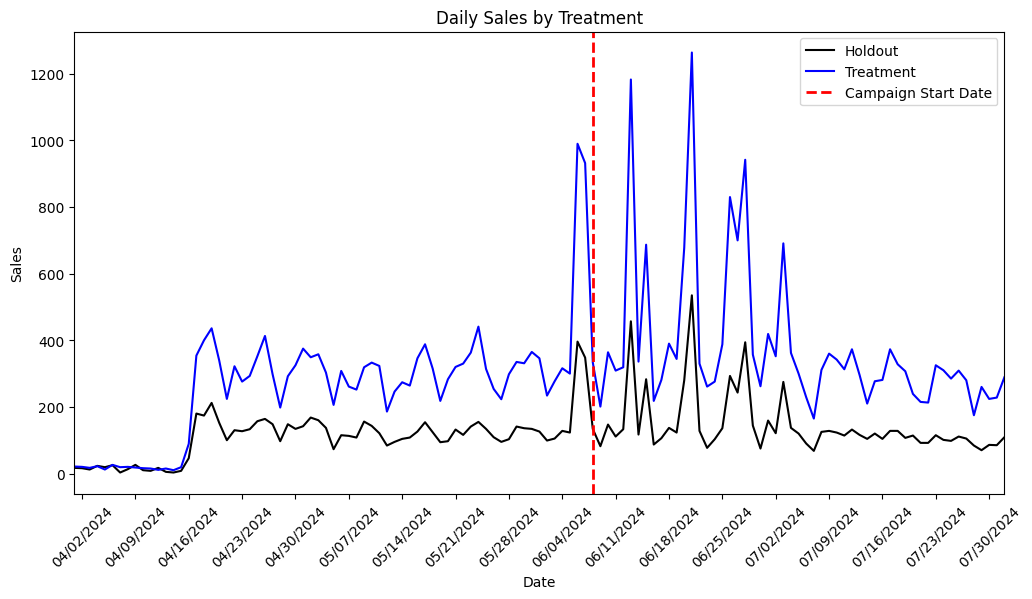

In [0]:
##################################################################

df = df[df['Day']<=campaign_end_date]

KPI_Metric = 'dskey'

# Group by Day and Holdout and calculate the sum of 'count_subscription'
df_daily = df.groupby(['Day', 'Holdout'])[KPI_Metric].sum().reset_index()
df_daily = df_daily[df_daily['Holdout']!='NA']

# Pivot the data so that 'Treatment' values become the column headers
df_daily_pivot = df_daily.pivot(index='Day', columns='Holdout', values=KPI_Metric)

# Plot the data
fig, ax = plt.subplots(figsize=(12, 6))
df_daily_pivot.plot(kind='line', ax=ax, color={'Holdout': 'black', 'Treatment': 'blue'})

# Add a vertical line to indicate the campaign start date
plt.axvline(campaign_start_date, color='r', linestyle='--', lw=2, label='Campaign Start Date')

# Set the x-axis label
plt.xlabel('Date')
# Set the y-axis label
plt.ylabel('Sales')
# Set the plot title
plt.title('Daily Sales by Treatment')
plt.legend()

# Format the x-axis dates
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # set major ticks interval every week
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))  # set format of the dates
plt.xticks(rotation=45)
plt.gca().xaxis.set_minor_locator(plt.NullLocator())
# Show the plot
plt.show()



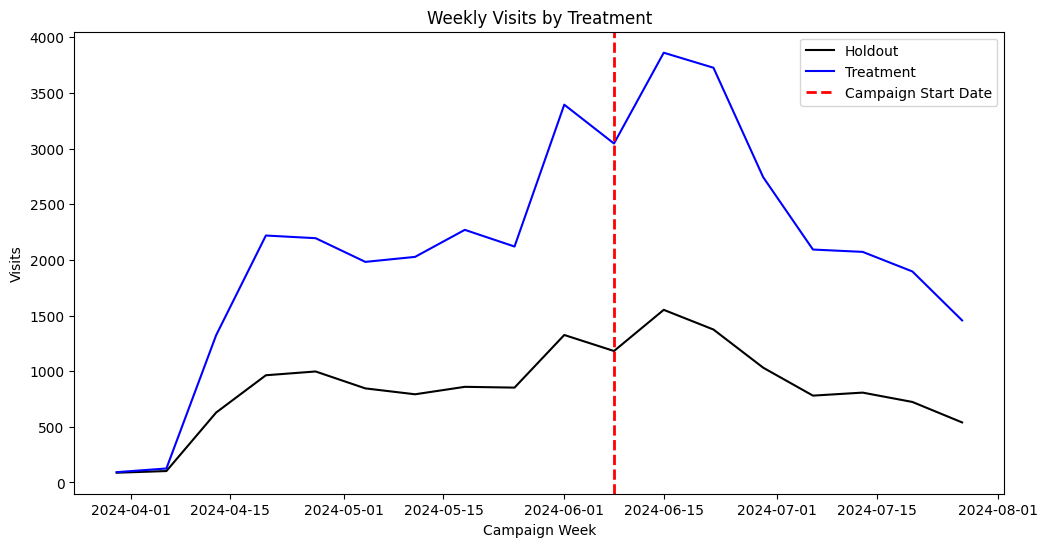

In [0]:
# Group by 'Campaign_Week' and 'Treatment' and calculate the sum of 'count_subscription'

df_weekly = df.groupby(['Campaign_Week', 'Holdout'])[KPI_Metric].sum().reset_index()
df_weekly = df_weekly[df_weekly['Holdout']!='NA']


# Create a new figure and set the size
plt.figure(figsize=(12, 6))

# Use seaborn to create a line plot
sns.lineplot(x='Campaign_Week', y=KPI_Metric, hue='Holdout', data=df_weekly, palette={'Holdout': 'black', 'Treatment': 'blue'})

# Add a vertical line to indicate the campaign start date
plt.axvline(campaign_start_date, color='r', linestyle='--', lw=2, label='Campaign Start Date')

# Set the x-axis label
plt.xlabel('Campaign Week')
# Set the y-axis label
plt.ylabel('Visits')
# Set the plot title
plt.title('Weekly Visits by Treatment')
plt.legend()

# Show the plot
plt.show()


#### 4B Overall Performance

In [0]:
# Define pre and post periods
post_start = pd.to_datetime('06/08/2024')
post_end = pd.to_datetime('08/01/2024')

pre_end = pd.to_datetime('06/05/2024')
#pre_start = pd.to_datetime('04/17/2024')
pre_start = pre_end - (post_end - post_start)
print(pre_start, pre_end)
print(post_start, post_end)

# Filter dataframe for pre and post periods
df_pre = df[(df['Day'] >= pre_start) & (df['Day'] <= pre_end)]
df_post = df[(df['Day'] >= post_start) & (df['Day'] <= post_end)]

#define Scale value:
scale = 3

# Aggregate subscription counts for treatment and control groups in pre and post periods
pre_treatment_subs = df_pre[df_pre['Holdout'] == 'Treatment'][KPI_Metric].sum()
pre_control_subs = df_pre[df_pre['Holdout'] == 'Holdout'][KPI_Metric].sum()
pre_control_subs = pre_control_subs * scale

post_treatment_subs = df_post[df_post['Holdout'] == 'Treatment'][KPI_Metric].sum()
post_control_subs = df_post[df_post['Holdout'] == 'Holdout'][KPI_Metric].sum()
post_control_subs = post_control_subs * scale

# Calculate differences in subscription counts between pre and post periods
diff_in_diff = (post_treatment_subs - pre_treatment_subs) - (post_control_subs - pre_control_subs)

avg_pre_control = pre_control_subs

print(f"Difference in Differences (DiD) for {KPI_Metric} :", diff_in_diff)
print(f"DiD % Lift:", round(diff_in_diff/avg_pre_control*100,2))


2024-04-12 00:00:00 2024-06-05 00:00:00
2024-06-08 00:00:00 2024-08-01 00:00:00
Difference in Differences (DiD) for dskey : 919
DiD % Lift: 4.69


In [0]:

################ DID Regression ################################

groupby_col = ['Holdout', 'Day']
df_agg = df.groupby(groupby_col)[[KPI_Metric]].sum().reset_index()     

#df_agg.info()
df_agg['Treatment_coded'] = df_agg['Holdout'].apply(lambda x: 1 if x=='Treatment' else (0 if x=='Holdout' else 2))


### Model at Campaign Week level
df_agg['Period_coded'] = df_agg['Day'].apply(lambda x: 1 if post_start <= x <= post_end 
                                                       else (0 if pre_start <= x <= pre_end
                                                       else 2))

#df_pair['Period_coded'].unique()
df_model = df_agg[df_agg['Period_coded']<2].copy()

#Remove NA?
df_model = df_model[df_model['Treatment_coded']<2].copy()

#Create an interaction term for treatment and period
df_model['Interaction'] = df_model['Treatment_coded'] * df_model['Period_coded']
#df_model['Y'] = df_model[KPI_Metric]

# Fit the model
model = ols(f'{KPI_Metric} ~ Treatment_coded + Period_coded + Interaction', data=df_model).fit()
#model = ols('Y ~ Treatment_coded * Period_coded', data=df_model).fit()

interaction_p_value = model.pvalues.Interaction

# Print the summary statistics
print(model.summary())
print(interaction_p_value)

#df_model.describe()

                            OLS Regression Results                            
Dep. Variable:                  dskey   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     45.33
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           9.19e-23
Time:                        13:28:28   Log-Likelihood:                -1389.0
No. Observations:                 220   AIC:                             2786.
Df Residuals:                     216   BIC:                             2800.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         118.8000     18.177     

#### 4C Performance by Segments

##### Function

In [0]:
def did_analysis(df_model: pd.DataFrame, 
                 pre_start: str, 
                 pre_end: str, 
                 post_start: str, 
                 post_end: str, 
                 kpi_metric: str, 
                 scale:int,
                 day_week: str,
                 column_name: str, 
                 value: str
):
    
    # Convert date strings to datetime
    pre_start = pd.to_datetime(pre_start)
    pre_end = pd.to_datetime(pre_end)
    post_start = pd.to_datetime(post_start)
    post_end = pd.to_datetime(post_end)

    # Aggregate data
    groupby_col = ['Holdout', day_week]
    df_agg = df_model.groupby(groupby_col)[kpi_metric].sum().reset_index()

    # Create a 'Period' column
    df_agg['Period'] = df_agg[day_week].apply(lambda x: 'pre' if pre_start <= x <= pre_end
                                             else ('post' if post_start <= x <= post_end 
                                             else 'other'))

    # Filter data for pre and post periods
    df_filtered = df_agg[df_agg['Period'].isin(['pre', 'post'])]
    #print(df_filtered[df_filtered['Period']=='pre'][day_week].unique())

    # Aggregate subscription counts for treatment and control groups in pre and post periods
    df_agg_did = df_filtered.groupby(['Holdout', 'Period'])[kpi_metric].sum().unstack()
    #print(df_agg_did.head())

    # Calculate DiD
    did = (df_agg_did.loc['Treatment', 'post'] - df_agg_did.loc['Treatment', 'pre']) - (df_agg_did.loc['Holdout', 'post'] - df_agg_did.loc['Holdout', 'pre'])*scale
    lift_perc = did / (df_agg_did.loc['Holdout', 'pre']*scale) * 100

    # Prepare data for regression
    df_filtered['Treatment_coded'] = (df_agg['Holdout'] == 'Treatment').astype(int)
    df_filtered['Period_coded'] = (df_filtered['Period'] == 'post').astype(int)
    df_filtered['Interaction'] = df_filtered['Treatment_coded'] * df_filtered['Period_coded']

    # Fit the model
    model = ols(f'{kpi_metric} ~ Treatment_coded + Period_coded + Interaction', data=df_filtered).fit()

    # Get the p-value of the interaction term
    interaction_p_value = model.pvalues.Interaction

    # Print the summary statistics
    print(model.summary())

    # Return results
    return {
        column_name: value,
        'DID': did,
        'Lift %': round(lift_perc, 2),
        'P-value': round(interaction_p_value, 4)
    }

#### 4D Model Output

In [0]:
### Test for Total
result = did_analysis(
    df_model=df,
    pre_start='2024-04-12',
    pre_end='2024-06-05',
    post_start='2024-06-08',
    post_end='2024-08-01',
    kpi_metric=KPI_Metric,
    scale=3,
    day_week = 'Day',
    column_name='Total',
    value= 'Total'
)

result

                            OLS Regression Results                            
Dep. Variable:                  dskey   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     45.33
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           9.19e-23
Time:                        13:29:18   Log-Likelihood:                -1389.0
No. Observations:                 220   AIC:                             2786.
Df Residuals:                     216   BIC:                             2800.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         118.8000     18.177     

{'Total': 'Total', 'DID': 919, 'Lift %': 4.69, 'P-value': 0.0572}

In [0]:
# Define the clusters and groups to include
Segments = df['Segment'].unique()
    
# Initialize an empty list to store the results
results_Segments = []

for segment in Segments:
    print(segment)
    result_sg = did_analysis(
        df[df['Segment'] == segment].copy(),
        pre_start='2024-04-12',
        pre_end='2024-06-05',
        post_start='2024-06-08',
        post_end='2024-08-01',
        kpi_metric=KPI_Metric,
        scale=3,
        day_week = 'Day', 
        column_name="Segment", 
        value=segment
    )
    results_Segments.append(result_sg)

# Convert the list of results to a DataFrame
df_results_Segments = pd.DataFrame(results_Segments)   
df_results_Segments

Paid Marketing + Cardlytics
                            OLS Regression Results                            
Dep. Variable:                  dskey   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     44.93
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           1.40e-22
Time:                        13:29:39   Log-Likelihood:                -1137.1
No. Observations:                 219   AIC:                             2282.
Df Residuals:                     215   BIC:                             2296.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept     

Segment  DID  Lift %  P-value
0  Paid Marketing + Cardlytics  248    3.68   0.0645
1               Paid Marketing  263    4.09   0.0611
2                   Cardlytics  408    6.34   0.0658